##Lecture 9: evaluating ranked retrieval systems

We will discuss some measures for evaluating rank retrieval methods.  

To start let's imagine we have an information need that is satisfied by a set Relevant of relevant documents and three rankings returned by three systems.  We want a measure that tells us which one provides a better ranking.  Note that what we mean by "better" can depend on the use case.

In [9]:
from __future__ import print_function
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
## 6 relevant documents:
Relevant=["A","B","C","D","E","F"]

## rankings returned by 3 systems, we use # for non=relevant results:
S1=["A",
    "#",
    "B",
    "C",
    "#",
    "#",
    "#",
    "#",
    "D",
    "#"]

S2=["A",
    "#",
    "B",
    "#",
    "C",
    "#",
    "#",
    "D",
    "#",
    "#"]

S3=["#",
    "#",
    "#",
    "#",
    "A",
    "B",
    "C",
    "D",
    "E",
    "F"]

calculating set precision and recall

In [22]:
def isRelevant(item):
    if item in Relevant:
        return True

def precision(Sys):
    return len([item for item in Sys if isRelevant(item)])/len(Sys)

def recall(Sys):
    return len([item for item in Sys if isRelevant(item)])/len(Relevant)




since precision is a set measure, it  should be the same for S1 and S2 should be the same (they return the same results)

In [23]:
print(precision(S1))
print(precision(S2))
print(precision(S3))

0.4
0.4
0.6


same for recall:

In [24]:
print(recall(S1))
print(recall(S2))
print(recall(S3))

0.666666666667
0.666666666667
1.0


the first attempt to take the ranking into account is to calculate precision@k:  the precision of the set formed by the first k returned documents

In [25]:
def precision_at_k(Sys,k):
   return precision(Sys[:k]) 
    
print (" ".join([str("Rank"), str("Item"), "P@k"]))
for rank,item in enumerate(S1):
    rank+=1 
    print ("    ".join([str(rank), str(item), "{0:.2f}".format(precision_at_k(S1,rank))]))


Rank Item P@k
1    A    1.00
2    #    0.50
3    B    0.67
4    C    0.75
5    #    0.60
6    #    0.50
7    #    0.43
8    #    0.38
9    D    0.44
10    #    0.40


In [26]:
print (" ".join([str("Rank"), str("Item"), "P@k"]))
for rank,item in enumerate(S2):
    rank+=1 
    print ("    ".join([str(rank), str(item), "{0:.2f}".format(precision_at_k(S2,rank))]))


Rank Item P@k
1    A    1.00
2    #    0.50
3    B    0.67
4    #    0.50
5    C    0.60
6    #    0.50
7    #    0.43
8    D    0.50
9    #    0.44
10    #    0.40


We can do the same for recall

In [31]:
def recall_at_k(Sys,k):
   return recall(Sys[:k]) 

print (" ".join([str("Rank"), str("Item"), " P@k","   R@k"]))
for rank,item in enumerate(S1):
    rank+=1 
    print ("    ".join([str(rank), str(item), "{0:.2f}".format(precision_at_k(S1,rank)),"{0:.2f}".format(recall_at_k(S1,rank))]))

print(" ")
    
    
print (" ".join([str("Rank"), str("Item"), " P@k","   R@k"]))
for rank,item in enumerate(S2):
    rank+=1 
    print ("    ".join([str(rank), str(item), "{0:.2f}".format(precision_at_k(S1,rank)),"{0:.2f}".format(recall_at_k(S1,rank))]))


print(" ")
    
    
print (" ".join([str("Rank"), str("Item"), " P@k","   R@k"]))
for rank,item in enumerate(S3):
    rank+=1 
    print ("    ".join([str(rank), str(item), "{0:.2f}".format(precision_at_k(S1,rank)),"{0:.2f}".format(recall_at_k(S1,rank))]))

Rank Item  P@k    R@k
1    A    1.00    0.17
2    #    0.50    0.17
3    B    0.67    0.33
4    C    0.75    0.50
5    #    0.60    0.50
6    #    0.50    0.50
7    #    0.43    0.50
8    #    0.38    0.50
9    D    0.44    0.67
10    #    0.40    0.67
 
Rank Item  P@k    R@k
1    A    1.00    0.17
2    #    0.50    0.17
3    B    0.67    0.33
4    #    0.75    0.50
5    C    0.60    0.50
6    #    0.50    0.50
7    #    0.43    0.50
8    D    0.38    0.50
9    #    0.44    0.67
10    #    0.40    0.67
 
Rank Item  P@k    R@k
1    #    1.00    0.17
2    #    0.50    0.17
3    #    0.67    0.33
4    #    0.75    0.50
5    A    0.60    0.50
6    B    0.50    0.50
7    C    0.43    0.50
8    D    0.38    0.50
9    E    0.44    0.67
10    F    0.40    0.67


And now we  print the precision vs recall, i.e., the "precision-recall" plot

(0, 1.1)

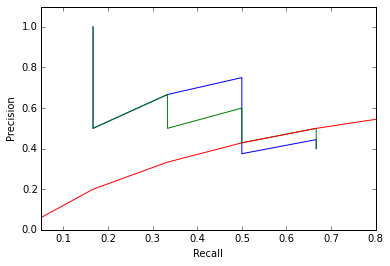

In [32]:
plt.plot([recall_at_k(S1,rank) for rank in range(1,11)],[precision_at_k(S1,rank) for rank in range(1,11)])
plt.plot([recall_at_k(S2,rank) for rank in range(1,11)],[precision_at_k(S2,rank) for rank in range(1,11)])
plt.plot([recall_at_k(S3,rank) for rank in range(1,11)],[precision_at_k(S3,rank) for rank in range(1,11)])

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0.05,0.8])
plt.ylim([0,1.1])


We can see that S3 stands out as a system that favore recall and sacrifces precision to the top.  However, we might still want to summarize the performance in a single number.

One way to do this is to calculate "Average precision".  This measure averages precisions calculated every time a new relevant document is retrieved.

In [33]:
def precision_up_to(Sys,d):
    if d not in Sys:
        return 0
    rank_d=Sys.index(d)+1
    ranked_below=Sys[:rank_d]
    return precision(ranked_below)

In [34]:
def average_precision(Sys):
    ap=0
    for d in Relevant:
        ap+=precision_up_to(Sys,d)
    return ap/len(Relevant)

In [35]:
print("{0:.2f}".format(average_precision(S1)))
print("{0:.2f}".format(average_precision(S2)))
print("{0:.2f}".format(average_precision(S3)))

0.48
0.46
0.44


S1 is slightly better than S2, partly because you can reach C with only seeing one non-relevant result

#Just for fun:  
Let's now try to desing a measure that rewards rankings that cluster relevant results together, independent on how highly ranked there are.  We will modify our 3 rankings such that S1 has one group of relevant results clustered together (C and D), S2 has none, and S3 has 5 relevant results clustered together.  So our measure should say that S3 is the best system, S1 is second best.

We will define a function that for every relevant document d calculates the precision of the set of documents around d (including d) 

In [40]:
def precision_around(Sys,d):
    if d not in Sys:
        return 0
    rank_d=Sys.index(d)+1
    ranked_around=Sys[rank_d-1:rank_d+1]
    return precision(ranked_around)


update average_precision to use this function, instead of precision_up_to

In [41]:
def avrage_precision_around(Sys):
    ap=0
    for d in Relevant:
        ap+=precision_around(Sys,d)
    return ap/len(Relevant)

In [42]:
def average_precision_around(Sys):
    ap=0
    for d in Relevant:
        ap+=precision_around(Sys,d)
    return ap/len(Relevant)

In [43]:
print("{0:.2f}".format(average_precision_around(S1)))
print("{0:.2f}".format(average_precision_around(S2)))
print("{0:.2f}".format(average_precision_around(S3)))

0.42
0.33
1.00


Indeed, we get S3 being the best system followed by S1